In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram
from scipy.spatial.distance import pdist, squareform
from qmplot import qqplot
%matplotlib inline 
import pylab as py
import statistics
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats as ss

# Clustering

Make df of data

In [2]:
expression_df = pd.read_csv("all_annotated.csv")
expression_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


Limit the dataset to genes with a median expression across samples of greater than zero

In [3]:
medians = expression_df.median(axis=1)
expression_df["medians"] = medians
expression_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,18.002343
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,2.037699
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [4]:
zero = expression_df[expression_df["medians"] == 0].index
expression_df.drop(zero, inplace=True)
expression_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570,18.002343
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622,7.408367
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486,16.617589
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521,51.024830
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049,71.833485
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891,211.546905
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090,1913.698243
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507,0.026254


Apply a log2(FPKM + 0.1) transformation to the data

Remove first two name columns from dataframe

In [5]:
transform_df = expression_df.iloc[:, 2:]
transform_df

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
3,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570,18.002343
8,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622,7.408367
9,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486,16.617589
10,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521,51.024830
11,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049,71.833485
34665,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891,211.546905
34667,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090,1913.698243
34684,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507,0.026254


log2(FPKM + 0.1) transform

In [6]:
transform_df = np.log2(transform_df + 0.1)
transform_df

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,4.178105
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,2.908499
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,4.063295
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,5.675952
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,6.217169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,6.168592
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,7.725516
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,10.902223
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,-2.985605


Merge transform df back to names

In [7]:
names_df = expression_df.iloc[:, :2]
names_df

,t_name,gene_name
3,FBtr0302347,CR40182
8,FBtr0113885,Parp
9,FBtr0301810,Alg-2
10,FBtr0113895,Tim17b
11,FBtr0345179,Tim17b
...,...,...
34663,FBtr0100884,mt:Cyt-b
34665,FBtr0100886,mt:ND1
34667,FBtr0100888,mt:lrRNA
34684,FBtr0114261,CR41590


In [8]:
df_merge = pd.concat([names_df, transform_df],axis =1)
df_merge

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,4.178105
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,2.908499
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,4.063295
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,5.675952
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,6.217169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,6.168592
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,7.725516
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,10.902223
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,-2.985605


Cluster the data matrix for both genes and samples on their patterns of expression (so both the rows and columns of the matrix), and plot a heatmap of the gene expression data.

Linkage matrix

In [9]:
linkage_matrix = linkage(transform_df, 'ward')
linkage_matrix

array([[5.31400000e+03, 5.31500000e+03, 0.00000000e+00, 2.00000000e+00],
       [8.46900000e+03, 8.47000000e+03, 0.00000000e+00, 2.00000000e+00],
       [7.71000000e+03, 7.71100000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.72190000e+04, 1.72200000e+04, 4.29699070e+02, 3.29400000e+03],
       [1.72180000e+04, 1.72210000e+04, 6.11873796e+02, 5.31900000e+03],
       [1.72220000e+04, 1.72230000e+04, 1.06649515e+03, 8.61300000e+03]])

# Clustermap

/Users/cmdb/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


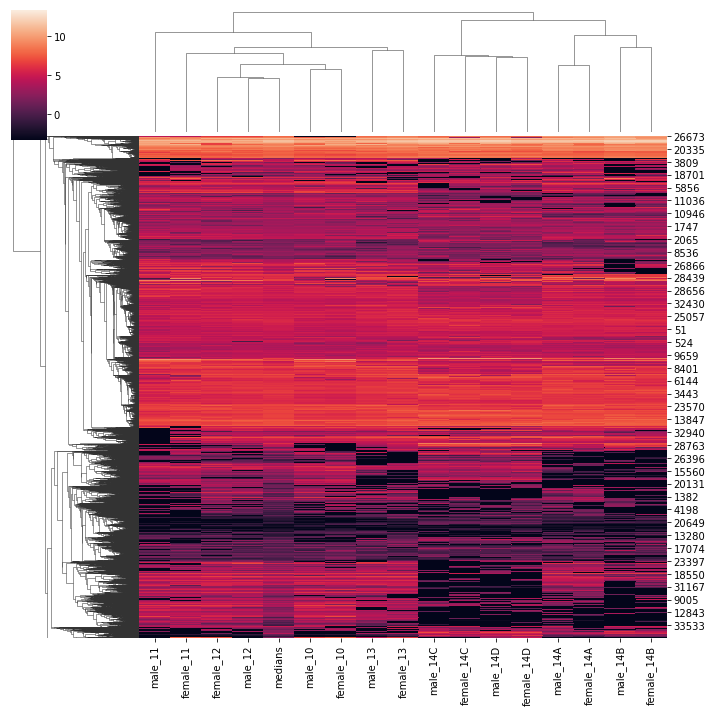

In [10]:
sns.clustermap(transform_df)

# Dendrogram

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


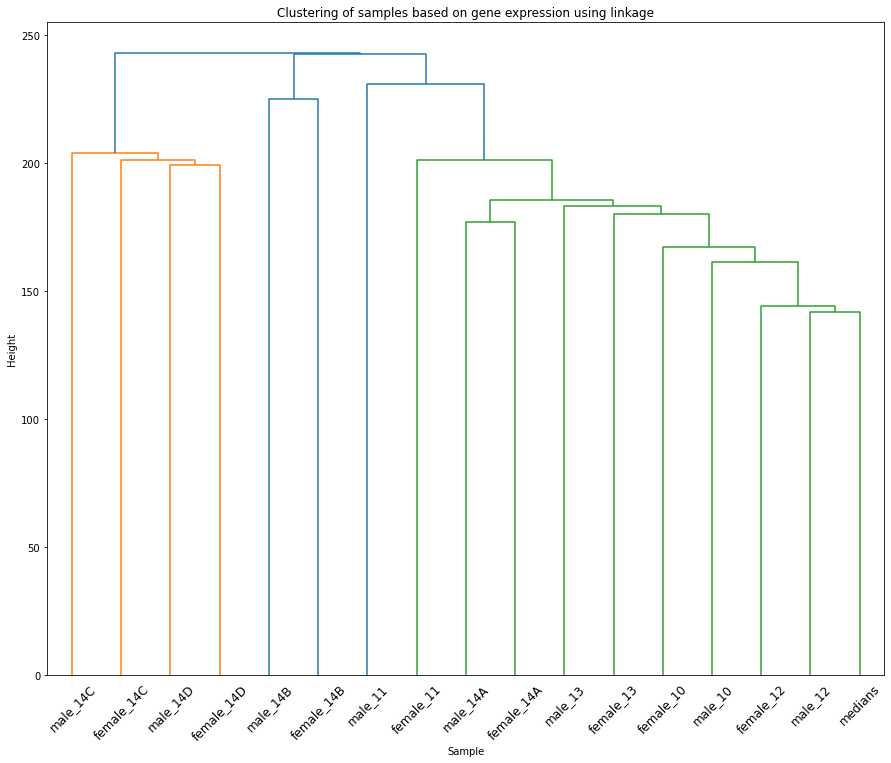

In [11]:
df = linkage(transform_df.T)
color_threshold= 0.85*max(df[:,2])
fig, ax = plt.subplots(figsize=(15,12))
dn = dendrogram(df, labels=transform_df.columns, color_threshold=color_threshold, ax=ax)
plt.xlabel('Sample')
plt.ylabel('Height')
plt.xticks(Rotation=45)
plt.title('Clustering of samples based on gene expression using linkage')
plt.show()

# Differential expression 

# QQ plot

OLS regression for finding differentially expressed genes bw all the stages

In [12]:
#change index to gene names
expression_df = df_merge.iloc[:,1:]
expression_df = expression_df.set_index(expression_df.columns[0])
expression_df

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
gene_name,,,,,,,,,,,,,,,,,
CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,4.178105
Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,2.908499
Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,4.063295
Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,5.675952
Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,6.217169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,6.168592
mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,7.725516
mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,10.902223


In [13]:
#change column names to only numbers
expression_df.rename(columns = {"male_10": 10, "male_11": 11, "male_12": 12, "male_13": 13, "male_14A" : 14, "male_14B": 14, "male_14C": 14, "male_14D":14, "female_10": 10, "female_11": 11, "female_12": 12, "female_13": 13, "female_14A": 14, "female_14B": 14, "female_14C": 14, "female_14D": 14}, inplace=True)
difexpdf = expression_df.iloc[:,:-1]
difexpdf

,10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14
gene_name,,,,,,,,,,,,,,,,
CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


In [14]:
#generate p-values
p_values=[]
for i in range (len(difexpdf)):
    x = difexpdf.iloc[i]
    stages = [10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14]
    model = sm.OLS(stages,x)
    results = model.fit()
    p_values.append(results.pvalues[0])
p_values
#p-value correction
FDR_correction = list(ss.multitest.fdrcorrection(np.array(p_values), alpha = 0.1)[1])

In [15]:
#make a dataframe that has both p-values and gene names
difexp_df_pvals = pd.DataFrame(FDR_correction,difexpdf.index)
difexp_df_pvals.rename(columns = {0: "p-value"})
difexp_df_pvals

,0
gene_name,
CR40182,3.240009e-13
Parp,4.489964e-01
Alg-2,6.587455e-06
Tim17b,5.097371e-10
Tim17b,1.021719e-12
...,...
mt:Cyt-b,1.567449e-07
mt:ND1,1.219577e-07
mt:lrRNA,9.676484e-11


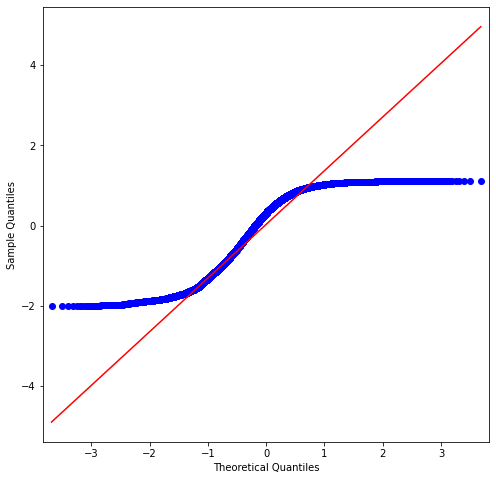

In [16]:
#qqplot need to use corrected p-values list not dataframe
fig, ax = plt.subplots(figsize=(8,8))
sm.qqplot(np.log10(FDR_correction), line='q', fit=True, ax=ax)
plt.show()

# List of differentially expressed genes, with and without sex as a covariate

Without sex as a covariate: 

In [17]:
#sort p-values FDR correction performed in qq plot question 
p_values_sort = difexp_df_pvals.sort_values(by=[0])
p_values_sort

,0
gene_name,
CG17249,7.425176e-18
CG11781,7.425176e-18
His4r,7.425176e-18
GILT2,7.425176e-18
His4r,7.425176e-18
...,...
oys,9.964604e-01
pre-mod(mdg4)-AB,9.998612e-01
PGAP3,9.998612e-01


In [18]:
#List of differentially expressed genes with FDR < 10% without sex as a covariate
p_values_sig = p_values_sort.loc[p_values_sort[0] < 0.1]
p_values_sig

,0
gene_name,
CG17249,7.425176e-18
CG11781,7.425176e-18
His4r,7.425176e-18
GILT2,7.425176e-18
His4r,7.425176e-18
...,...
CG18428,9.972280e-02
CG42542,9.977907e-02
tan,9.982066e-02


In [19]:
index_list = p_values_sig.index.tolist()
print(index_list)

['CG17249', 'CG11781', 'His4r', 'GILT2', 'His4r', 'CG10555', 'Sucb', 'Sucb', 'MAGE', 'TfIIB', 'CG9240', 'zuc', 'CG12343', 'rho-4', 'Taf10b', 'CG11077', 'CG4038', 'CG32708', 'cN-IIIB', 'CG5880', 'BI-1', 'TfIIB', 'CG11885', 'Cdk9', 'O-fut1', 'mRpL11', 'Spase12', 'CG1463', 'rho-4', 'CG8009', 'NHP2', 'NHP2', 'CG10877', 'CG1291', 'RpII18', 'Arp6', 'Pdxk', 'janA', 'CG7275', 'l(2)35Bd', 'CG11127', 'CG3662', 'Prp38', 'CG7970', 'CG5986', 'abs', 'CG14641', 'CG8680', 'cype', 'U2af50', 'CG16753', 'CG7006', 'CstF-50', 'mio', 'mbo', 'wcd', 'Cbp20', 'Bin1', 'Arpc4', 'CG4164', 'e(y)2', 'MED9', 'MED27', 'CG8680', 'Rpb4', 'Zip48C', 'CG1463', 'CG11808', 'CG30496', 'crok', 'Mfap1', 'CG3887', 'CG3560', 'Prp18', 'CG4447', 'CG4452', 'gammaTub23C', 'cype', 'CG7818', 'CG31917', 'UbcE2M', 'CG5902', 'PrBP', 'CG11190', 'Catsup', 'NTPase', 'CG10341', 'CG3887', 'Rpb5', 'Rpb5', 'CG8207', 'Pex19', 'CG9018', 'CG2063', 'CG5181', 'cbc', 'CG14286', 'Mtap', 'CG1463', 'CG9548', 'kin17', 'CG6066', 'CG11137', 'TfIIFalpha', '

With sex as a covariate:

In [20]:
sex_df = df_merge.iloc[:,1:-1]
sex_df.rename(columns = {"male_10": "male", "male_11": "male", "male_12": "male", "male_13": "male", "male_14A" : "male", "male_14B": "male", "male_14C": "male", "male_14D": "male", "female_10": "female", "female_11": "female", "female_12": "female", "female_13": "female", "female_14A": "female", "female_14B": "female", "female_14C": "female", "female_14D": "female"}, inplace=True)
sex_df = sex_df.set_index(sex_df.columns[0])
sex_df

,male,male,male,male,male,male,male,male,female,female,female,female,female,female,female,female
gene_name,,,,,,,,,,,,,,,,
CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


In [21]:
#generate p-values
p_values_sex=[]
b_values_sex=[]
for i in range (len(difexpdf)):
    x = difexpdf.iloc[i]
    stages = [10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14]
    sexes = ["male","male","male","male","male","male","male","male","female","female","female","female","female","female","female","female"]
    d = {"FPKM":x, "stage":stages, "sex":sexes}
    data = pd.DataFrame(data=d)
    model = smf.ols("stage ~ FPKM + sex", data=d)
    results = model.fit()
    p_values_sex.append(results.pvalues[0])
    b_values_sex.append(results.params[1])
p_values_sex
#p-value correction
FDR_correction = list(ss.multitest.fdrcorrection(np.array(p_values_sex), alpha = 0.1)[1])

In [22]:
#make a dataframe that has both p-values and gene names
difexpsex_df_pvals = pd.DataFrame(FDR_correction,difexpdf.index)
difexpsex_df_pvals.rename(columns = {0: "p-value"})
difexpsex_df_pvals

,0
gene_name,
CR40182,1.700665e-02
Parp,2.806795e-11
Alg-2,2.046951e-08
Tim17b,4.035253e-05
Tim17b,2.729753e-03
...,...
mt:Cyt-b,6.572090e-08
mt:ND1,1.122817e-07
mt:lrRNA,6.927587e-05


In [23]:
#sort
p_values_sort_sex = difexpsex_df_pvals.sort_values(by=[0])
p_values_sort_sex

,0
gene_name,
Ppa,3.937916e-19
Ppa,3.937916e-19
Ppa,3.937916e-19
CG2129,4.185222e-16
CR45270,9.078484e-16
...,...
sqh,9.859181e-01
Trax,9.907924e-01
CG5862,9.940232e-01


In [24]:
#FDR < 10%
p_values_sig_sex = p_values_sort_sex.loc[p_values_sort_sex[0] < 0.1]
p_values_sig_sex

,0
gene_name,
Ppa,3.937916e-19
Ppa,3.937916e-19
Ppa,3.937916e-19
CG2129,4.185222e-16
CR45270,9.078484e-16
...,...
CG17680,9.853630e-02
CG9350,9.924400e-02
l(1)G0193,9.933633e-02


In [25]:
#Generate list of differentially expressed genes with FDR < 10% wit sexh as a covariate
index_list2 = p_values_sig_sex.index.tolist()
print(index_list2)

['Ppa', 'Ppa', 'Ppa', 'CG2129', 'CR45270', 'CR45270', 'twi', 'CR45270', 'hkb', 'twi', 'CR44676', 'CG14915', 'CG10932', 'CG8026', 'Dtg', 'CG45085', 'CG34214', 'Bx', 'CG10932', 'CG6293', 'Ilp4', 'GstD3', 'Nrt', 'cbt', 'CG13454', 'sala', 'mira', 'D', 'Kr', 'brk', 'aret', 'CG43725', 'CR43949', 'CG6293', 'Kr', 'CG10035', 'CG15771', 'CG5059', 'CG15771', 'Cpr60D', 'CG6770', 'croc', 'CG6084', 'Cpr60D', 'D', 'Hmgs', 'CG1407', 'btd', 'retn', 'aralar1', 'CG5059', 'aralar1', 'CG9505', 'CG6084', 'mlt', 'mlt', 'brat', 'Dip-B', 'aralar1', 'cyc', 'CG42662', 'CG14937', 'spri', 'mlt', 'Hmgs', 'CG14852', 'CG18262', 'CG18266', 'CG30377', 'dhd', 'CG1407', 'skl', 'Obp99a', 'cib', 'Obp99a', 'fs(1)Ya', 'APC7', 'CG33156', 'Nnf1a', 'tal-AA', 'tal-1A', 'tal-2A', 'tal-3A', 'png', 'Jheh2', 'CG2974', 'Pp2B-14D', 'CG12024', 'Ggt-1', 'PyK', 'CG10035', 'E(spl)malpha-BFM', 'CG14440', 'Pp2B-14D', 'CG6428', 'Ggt-1', 'CG43340', 'CG11779', 'CG14440', 'yem', 'CG32732', 'eIF4G2', 'AP-2alpha', 'Bsg25D', 'RhoGAP68F', 'Gasz', '

# Percentage overlap: ((# overlapping genes) / (# genes in list without covariate)) * 100

In [26]:
overlapping_genes = [item for item in index_list2 if item in index_list]

percentage_overlap = (len(overlapping_genes)/len(index_list))*100

print(percentage_overlap)

95.663661796705


# Volcano plot with sex as a covariate

In [27]:
import bioinfokit as bioinfokit
from bioinfokit import analys, visuz

In [28]:
v = pd.DataFrame(list(zip(b_values_sex, FDR_correction)),columns=['slopes', 'p_values'])
v

,slopes,p_values
0,0.003236,1.700665e-02
1,0.140322,2.806795e-11
2,0.153864,2.046951e-08
3,0.849421,4.035253e-05
4,-0.218529,2.729753e-03
...,...,...
8608,0.134818,6.572090e-08
8609,0.224822,1.122817e-07
8610,-0.041027,6.927587e-05
8611,-0.220389,8.104446e-07


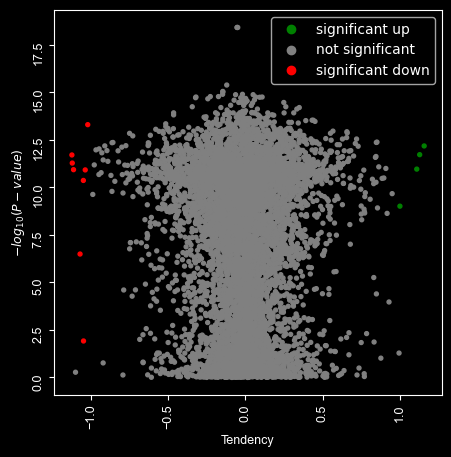

In [33]:
visuz.GeneExpression.volcano(df=v, lfc='slopes', pv='p_values', show = True, theme = "dark", plotlegend=True, legendpos='upper right', axxlabel = "Tendency")